# Understanding and Predicting Employee Turnover

HR Analytics Using IBM Dataset
***

### Objective
- To understand what factors contributed most to employee turnover.

- To perform clustering to find any meaningful patterns of employee traits.

- To create a model that predicts the likelihood if a certain employee will leave the company or not. 

- To create or improve different retention strategies on targeted employees. 

The implementation of this model will allow management to create better decision-making actions.

### Types of Analytics Used
1. Descriptive Analytics - What happened?
2. Predictive Analytics - What might happen?
3. Prescriptive Analytics - What should we do?


### Hypotheses

- Employees who get paid more and receive more training will stay.
- Long commute has a negative effect on employee wellbeing, therefore, will make them more likely to quit.
- Relationships with managers play an important role in attrition rate.
- Single people are more likely to jump between jobs.

## Table of Contents

### Data Quality Check
- [Data Overview](#overview)
- [Data Cleaning](#datacleaning)

### Descriptive Statistics & Exploratory Data Analysis
- [Summary Statistics, Turnover Rate, Size of Data](#descriptive_statistics)
- [Correlation Matrix](#correlation_matrix)

### Class Imbalance
- [How to Treat Class Imbalance Problems](#class_imbalance)

### Split Train/Test Set
- [Splitting the Data into Train/Test Sets](#train_test_split)

### Train/Test Model Perfomance with 5-Fold CV
- [Logistic Regression Classifier](#lr)
- [Random Forest Classifier](#rf)
- [Support Vector Classifier](#svc)

### Evaluation Metric (F1 Score & ROC/AUC)
- [ROC and AUC](#roc)
- [Feature Importance](#feature_importance)

### Conclusion




# Import Packages
***

In [3]:
# Import the neccessary modules for data manipulation and visual representation
import pandas as pd
import numpy as np
import json

# Visualization libraries
import seaborn as sns
import matplotlib.pyplot as plt
import pygal
import cufflinks as cf

# Statistical modeling
from sklearn import preprocessing
from sklearn.ensemble import AdaBoostClassifier
from sklearn import metrics
from sklearn.pipeline import Pipeline
from sklearn.feature_selection import mutual_info_classif
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report

from IPython.display import SVG, display
import warnings

warnings.filterwarnings("ignore")
%matplotlib inline

<a id='overview'></a>
# Data Overview
***

In [4]:
df = pd.read_csv('Employee-Attrition.csv')

In [3]:
# Examine the dataset
df.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2


In [4]:
df.tail()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
1465,36,No,Travel_Frequently,884,Research & Development,23,2,Medical,1,2061,...,3,80,1,17,3,3,5,2,0,3
1466,39,No,Travel_Rarely,613,Research & Development,6,1,Medical,1,2062,...,1,80,1,9,5,3,7,7,1,7
1467,27,No,Travel_Rarely,155,Research & Development,4,3,Life Sciences,1,2064,...,2,80,1,6,0,3,6,2,0,3
1468,49,No,Travel_Frequently,1023,Sales,2,3,Medical,1,2065,...,4,80,0,17,3,2,9,6,0,8
1469,34,No,Travel_Rarely,628,Research & Development,8,3,Medical,1,2068,...,1,80,0,6,3,4,4,3,1,2


In [5]:
#Check for the types, missing values, and any data inconsistency across all features
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
Age                         1470 non-null int64
Attrition                   1470 non-null object
BusinessTravel              1470 non-null object
DailyRate                   1470 non-null int64
Department                  1470 non-null object
DistanceFromHome            1470 non-null int64
Education                   1470 non-null int64
EducationField              1470 non-null object
EmployeeCount               1470 non-null int64
EmployeeNumber              1470 non-null int64
EnvironmentSatisfaction     1470 non-null int64
Gender                      1470 non-null object
HourlyRate                  1470 non-null int64
JobInvolvement              1470 non-null int64
JobLevel                    1470 non-null int64
JobRole                     1470 non-null object
JobSatisfaction             1470 non-null int64
MaritalStatus               1470 non-null object
MonthlyIncome         

<a id='datacleaning'></a>
# Data Cleaning
***

In [5]:
# drop id columns that're unnecessary for the analysis
columns = ["EmployeeCount", "EmployeeNumber", "Over18", "StandardHours"]
df.drop(columns, inplace=True, axis=1)

In [6]:
%load_ext blackcellmagic

In [7]:
# Put all categorical columns together in a list
categorical_columns = [
    "Attrition",
    "BusinessTravel",
    "Department",
    "EducationField",
    "Gender",
    "JobRole",
    "MaritalStatus",
    "OverTime",
]

In [8]:
# Deep copy of the original data. This means that the original data won't be affected no matter what changes made to the copy
data_encoded = df.copy(deep=True)

# Change categorical columns to numbers by assigning each value a number in order to perform statistical analysis
label_encode = preprocessing.LabelEncoder()
for col in categorical_columns:
    data_encoded[col] = label_encode.fit_transform(df[col])
    name_mapping = dict(
        zip(label_encode.classes_, label_encode.transform(label_encode.classes_))
    )
    print("- Feature", col + "" + ": mapping", name_mapping)
    print("")

- Feature Attrition: mapping {'No': 0, 'Yes': 1}

- Feature BusinessTravel: mapping {'Non-Travel': 0, 'Travel_Frequently': 1, 'Travel_Rarely': 2}

- Feature Department: mapping {'Human Resources': 0, 'Research & Development': 1, 'Sales': 2}

- Feature EducationField: mapping {'Human Resources': 0, 'Life Sciences': 1, 'Marketing': 2, 'Medical': 3, 'Other': 4, 'Technical Degree': 5}

- Feature Gender: mapping {'Female': 0, 'Male': 1}

- Feature JobRole: mapping {'Healthcare Representative': 0, 'Human Resources': 1, 'Laboratory Technician': 2, 'Manager': 3, 'Manufacturing Director': 4, 'Research Director': 5, 'Research Scientist': 6, 'Sales Executive': 7, 'Sales Representative': 8}

- Feature MaritalStatus: mapping {'Divorced': 0, 'Married': 1, 'Single': 2}

- Feature OverTime: mapping {'No': 0, 'Yes': 1}



<a id='descriptive_statistics'></a>
# Exploratory Data Analysis
***

In [10]:
#Check if the new converted dataframe is all numerical and show the statistical overview of the data
data_encoded.describe(include='all')

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,...,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,...,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000
mean,36.923810,0.161224,1.607483,802.485714,1.260544,9.192517,2.912925,2.247619,2.721769,0.600000,...,3.153741,2.712245,0.793878,11.279592,2.799320,2.761224,7.008163,4.229252,2.187755,4.123129
std,9.135373,0.367863,0.665455,403.509100,0.527792,8.106864,1.024165,1.331369,1.093082,0.490065,...,0.360824,1.081209,0.852077,7.780782,1.289271,0.706476,6.126525,3.623137,3.222430,3.568136
min,18.000000,0.000000,0.000000,102.000000,0.000000,1.000000,1.000000,0.000000,1.000000,0.000000,...,3.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,30.000000,0.000000,1.000000,465.000000,1.000000,2.000000,2.000000,1.000000,2.000000,0.000000,...,3.000000,2.000000,0.000000,6.000000,2.000000,2.000000,3.000000,2.000000,0.000000,2.000000
50%,36.000000,0.000000,2.000000,802.000000,1.000000,7.000000,3.000000,2.000000,3.000000,1.000000,...,3.000000,3.000000,1.000000,10.000000,3.000000,3.000000,5.000000,3.000000,1.000000,3.000000
75%,43.000000,0.000000,2.000000,1157.000000,2.000000,14.000000,4.000000,3.000000,4.000000,1.000000,...,3.000000,4.000000,1.000000,15.000000,3.000000,3.000000,9.000000,7.000000,3.000000,7.000000
max,60.000000,1.000000,2.000000,1499.000000,2.000000,29.000000,5.000000,5.000000,4.000000,1.000000,...,4.000000,4.000000,3.000000,40.000000,6.000000,4.000000,40.000000,18.000000,15.000000,17.000000


In [11]:
data_encoded.shape

(1470, 31)

There are now 31 variables and 1470 employees in this dataset.

In [139]:
df.Attrition.value_counts(1)

No     0.838776
Yes    0.161224
Name: Attrition, dtype: float64

Text(0,0.5,'Count')

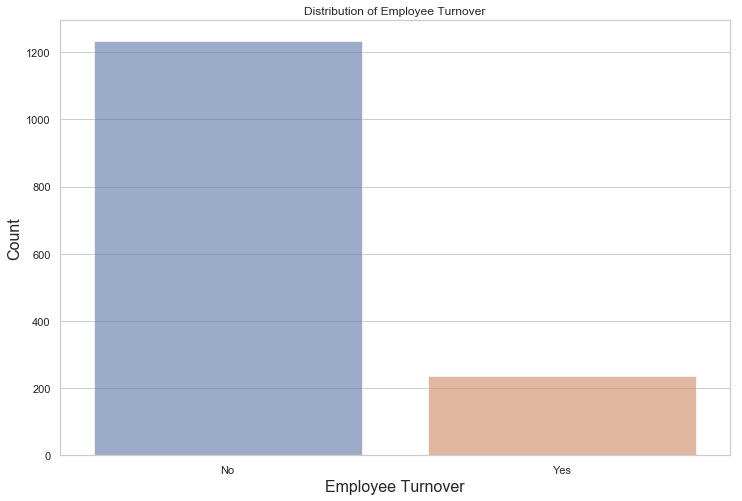

In [138]:
plt.figure(figsize=(12,8))
turnover = df.Attrition.value_counts()
sns.barplot(y=turnover.values, x=turnover.index, alpha=0.6)
plt.title('Distribution of Employee Turnover')
plt.xlabel('Employee Turnover', fontsize=16)
plt.ylabel('Count', fontsize=16)

### The turnover rate is **16.1%**.<br>
**83.9%** of employees stay at the company.
This is a highly unbalanced data, yet a typical situation.

In [46]:
# Display the mean summary of Employees (Turnover V.S. Non-turnover).
turnover_Summary = data_encoded.groupby('Attrition')
turnover_Summary.mean()

,Age,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,HourlyRate,...,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
Attrition,,,,,,,,,,,,,,,,,,,,,
0,37.561233,1.607461,812.504461,1.245742,8.915653,2.927007,2.231955,2.771290,0.593674,65.952149,...,3.153285,2.733982,0.845093,11.862936,2.832928,2.781022,7.369019,4.484185,2.234388,4.367397
1,33.607595,1.607595,750.362869,1.337553,10.632911,2.839662,2.329114,2.464135,0.632911,65.573840,...,3.156118,2.599156,0.527426,8.244726,2.624473,2.658228,5.130802,2.902954,1.945148,2.852321


From a quick look, employees who stay tend to have a higher average in Age, Daily Rate, Environment Satisfaction, Years with Current Manager, Training Times, Stock Option Level, Years at Company.

<a id='correlation_matrix'></a>
### Correlation Matrix

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,...,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
Age,1.000000,-0.159205,0.024751,0.010661,-0.031882,-0.001686,0.208034,-0.040873,0.010146,-0.036311,...,0.001904,0.053535,0.037510,0.680381,-0.019621,-0.021490,0.311309,0.212901,0.216513,0.202089
Attrition,-0.159205,1.000000,0.000074,-0.056652,0.063991,0.077924,-0.031373,0.026846,-0.103369,0.029453,...,0.002889,-0.045872,-0.137145,-0.171063,-0.059478,-0.063939,-0.134392,-0.160545,-0.033019,-0.156199
BusinessTravel,0.024751,0.000074,1.000000,-0.004086,-0.009044,-0.024469,0.000757,0.023724,0.004174,-0.032981,...,-0.026341,-0.035986,-0.016727,0.034226,0.015240,-0.011256,-0.014575,-0.011497,-0.032591,-0.022636
DailyRate,0.010661,-0.056652,-0.004086,1.000000,0.007109,-0.004985,-0.016806,0.037709,0.018355,-0.011716,...,0.000473,0.007846,0.042143,0.014515,0.002453,-0.037848,-0.034055,0.009932,-0.033229,-0.026363
Department,-0.031882,0.063991,-0.009044,0.007109,1.000000,0.017225,0.007996,0.013720,-0.019395,-0.041583,...,-0.024604,-0.022414,-0.012193,-0.015762,0.036875,0.026383,0.022920,0.056315,0.040061,0.034282
DistanceFromHome,-0.001686,0.077924,-0.024469,-0.004985,0.017225,1.000000,0.021042,0.002013,-0.016075,-0.001851,...,0.027110,0.006557,0.044872,0.004628,-0.036942,-0.026556,0.009508,0.018845,0.010029,0.014406
Education,0.208034,-0.031373,0.000757,-0.016806,0.007996,0.021042,1.000000,-0.039592,-0.027128,-0.016547,...,-0.024539,-0.009118,0.018422,0.148280,-0.025100,0.009819,0.069114,0.060236,0.054254,0.069065
EducationField,-0.040873,0.026846,0.023724,0.037709,0.013720,0.002013,-0.039592,1.000000,0.043163,-0.002504,...,-0.005614,-0.004378,-0.016185,-0.027848,0.049195,0.041191,-0.018692,-0.010506,0.002326,-0.004130
EnvironmentSatisfaction,0.010146,-0.103369,0.004174,0.018355,-0.019395,-0.016075,-0.027128,0.043163,1.000000,0.000508,...,-0.029548,0.007665,0.003432,-0.002693,-0.019359,0.027627,0.001458,0.018007,0.016194,-0.004999
Gender,-0.036311,0.029453,-0.032981,-0.011716,-0.041583,-0.001851,-0.016547,-0.002504,0.000508,1.000000,...,-0.013859,0.022868,0.012716,-0.046881,-0.038787,-0.002753,-0.029747,-0.041483,-0.026985,-0.030599


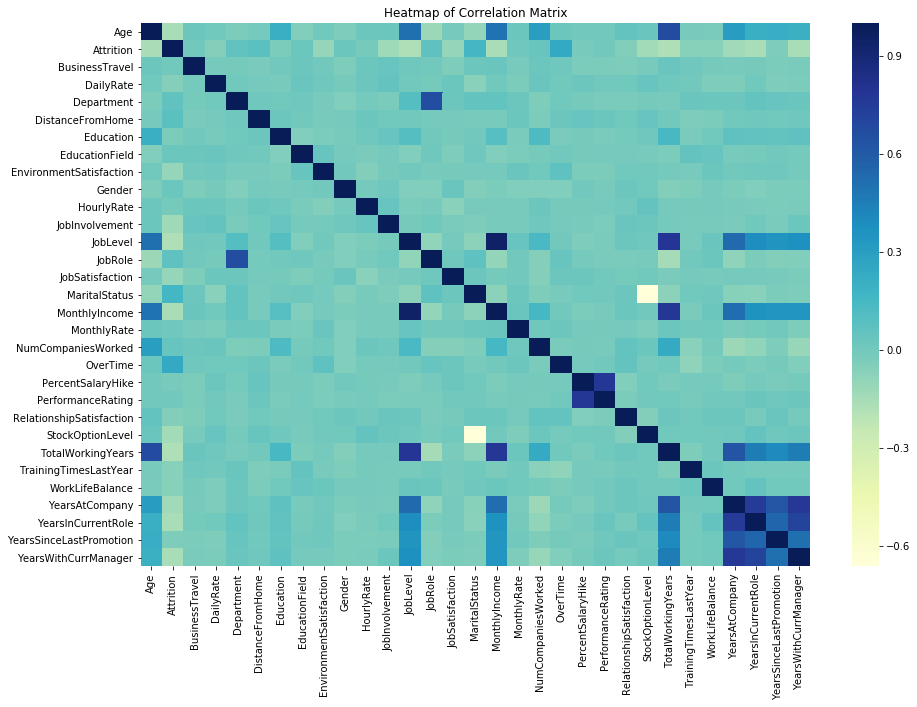

In [47]:
# Create a correlation matrix
corr = data_encoded.corr()
plt.rcParams["figure.figsize"] = [15,10]
sns.heatmap(corr, 
            xticklabels=corr.columns.values,
            yticklabels=corr.columns.values,cmap="YlGnBu")
plt.title('Heatmap of Correlation Matrix')
corr

**Observation from correlation analysis**
- Job Level, Monthly Income, Total Working Years are highly correlated with Age.
- Monthly Income is highly correlated with Total Working Years and Job Level.
- Performance Rating is highly correlated with Percent Salary Hike.
- Stock Option Level and Marital Status are negatively correlated.

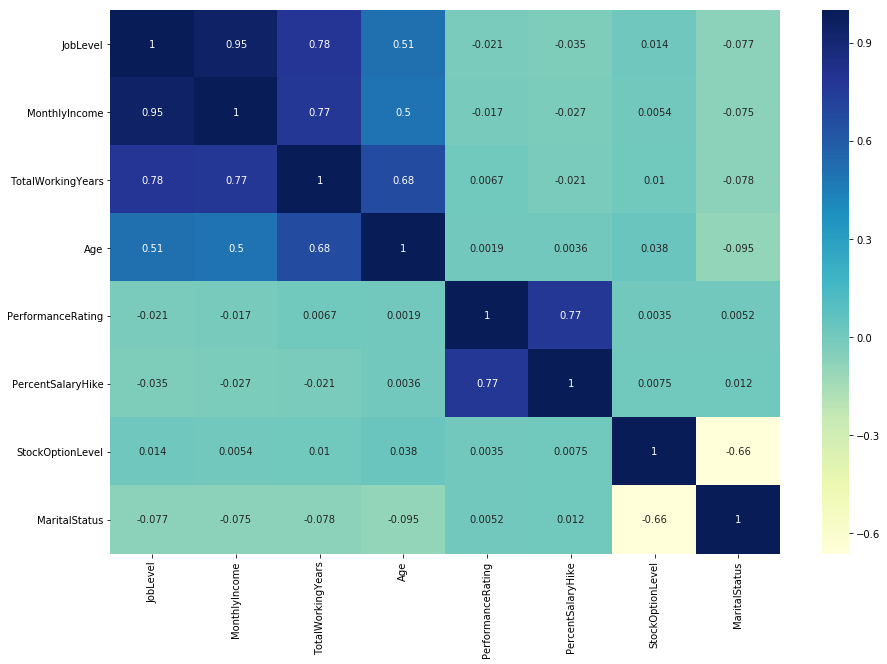

In [48]:
#Take a closer look at the above variables along wiht their correlation value
data_filtered = data_encoded[['JobLevel', 'MonthlyIncome', 'TotalWorkingYears','Age','PerformanceRating','PercentSalaryHike','StockOptionLevel','MaritalStatus']]
detail_correlation = data_filtered.corr()
plt.rcParams["figure.figsize"] = [15,10]
sns.heatmap(detail_correlation,xticklabels=detail_correlation.columns,yticklabels=detail_correlation.columns, cmap="YlGnBu", annot=True)

<a id='eda1'></a>
# EDA 1. 
## Distribution of Salary Increase, Performance Rating, and Job Involvement Distribution

Text(0,0.5,'Employee Count')

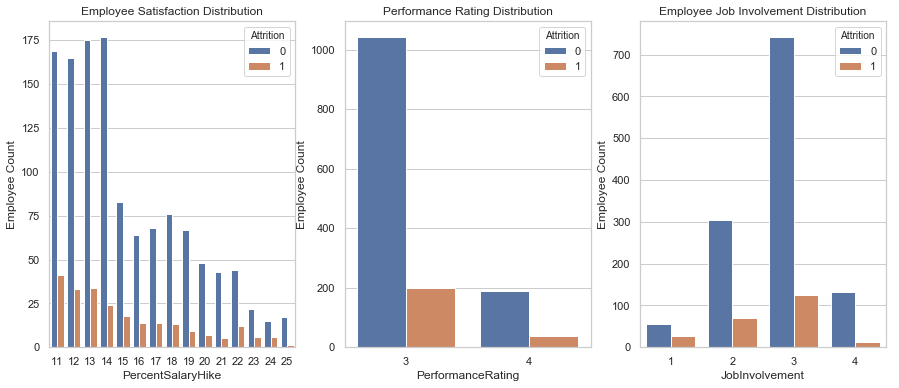

In [113]:
# Plot the distribution of Salary Increase, Performance Rating, and Job Involvement. What story can you tell?

# Set up the matplotlib figure
f, axes = plt.subplots(ncols=3, figsize=(15, 6))

ax = sns.countplot(x="PercentSalaryHike", hue="Attrition", data=data_encoded, ax=axes[0]).set_title('Employee Satisfaction Distribution')
axes[0].set_ylabel('Employee Count')

# Graph Employee Evaluation
sns.countplot(x="PerformanceRating", hue="Attrition", data=data_encoded, ax=axes[1]).set_title('Performance Rating Distribution')
axes[1].set_ylabel('Employee Count')

# Graph Employee Average Monthly Hours
sns.countplot(x="JobInvolvement", hue="Attrition", data=data_encoded, ax=axes[2]).set_title('Employee Job Involvement Distribution')
axes[2].set_ylabel('Employee Count')

Attrition: 0 = No, 1 = Yes

<a id='eda2'></a>
# EDA 2.
## Gender versus Attrition

In [70]:
df_age = data_encoded.copy(deep=True)
df_age.loc[df_age['Age'] <= 20, 'Age'] = 0
df_age.loc[(df_age['Age'] > 20) & (df_age['Age'] <= 30), 'Age'] = 1
df_age.loc[(df_age['Age'] > 30) & (df_age['Age'] <= 40), 'Age'] = 2
df_age.loc[(df_age['Age'] > 40) & (df_age['Age'] <= 50), 'Age'] = 3
df_age.loc[(df_age['Age'] > 50), 'Age'] = 4

In [71]:
df_age = pd.DataFrame({'count': df_age.groupby(["Gender", "Attrition"]).size()}).reset_index()
df_age['Gender-attrition'] = df_age['Gender'].astype(str) + "-" + df_age['Attrition'].astype(str).map(str)

In [72]:
df_age

,Gender,Attrition,count,Gender-attrition
0,0,0,501,0-0
1,0,1,87,0-1
2,1,0,732,1-0
3,1,1,150,1-1


Here,
- Gender - 0 and Attrition - 0 ===> Female employees who will stay
- Gender - 0 and Attrition - 1 ===> Female employees who will leave
- Gender - 1 and Attrition - 0 ===> Male employees who will stay
- Gender - 1 and Attrition - 1 ===> Male employees who will leave

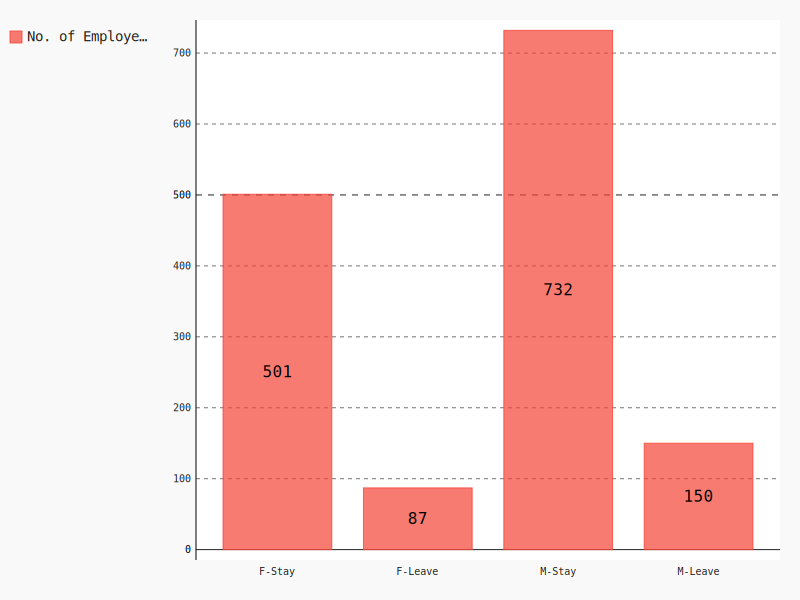

In [123]:
import pygal
chart = pygal.Bar(print_values=True)
chart.add('No. of Employees', df_age['count'])
chart.x_labels = ['F-Stay','F-Leave','M-Stay','M-Leave']
display(SVG(chart.render(disable_xml_declaration=True)))

## Marital versus Attrition


Categories:

1. 'Divorced': 0
2. 'Married' : 1
3. 'Single'  : 2

Single people are mostly to leave the company.

In [126]:
hrleft = df[df['Attrition']=='Yes']

hrleft = pd.DataFrame(hrleft.MaritalStatus.value_counts()).reset_index()
hrstay = pd.DataFrame(df.MaritalStatus.value_counts()).reset_index()

hr_merge = pd.merge(hrleft, hrstay, how='inner', on='index')

hr_merge = hr_merge.rename(columns={"MaritalStatus_x":'Left', "MaritalStatus_y":'Stay', "index":'Marital Status' })

hr_merge

,Marital Status,Left,Stay
0,Single,120,470
1,Married,84,673
2,Divorced,33,327


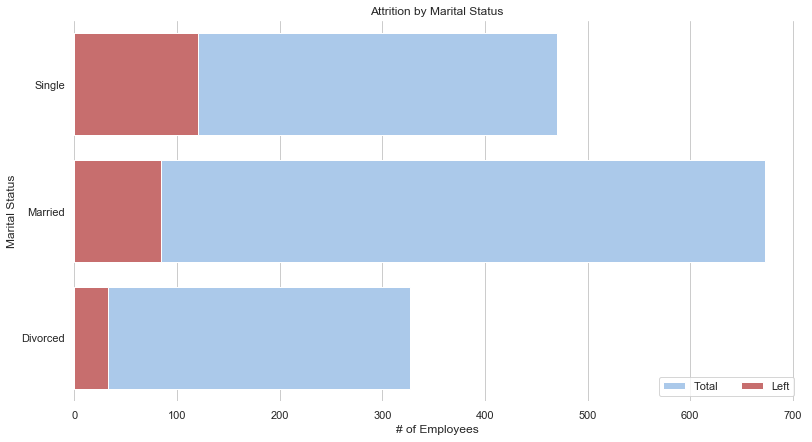

In [128]:
sns.set(style="whitegrid")

# Initialize the matplotlib figure
f, ax = plt.subplots(figsize=(13, 7))

# Plot the total schools per city
sns.set_color_codes("pastel")
sns.barplot(x="Stay", y='Marital Status', data=hr_merge,
            label="Total", color="b")

# Plot the total community schools per city
sns.set_color_codes("muted")
sns.barplot(x="Left", y="Marital Status", data=hr_merge,
            label="Left", color="r")

# Add a legend and informative axis label
ax.legend(ncol=2, loc="lower right", frameon=True)
ax.set( ylabel="Marital Status", title='Attrition by Marital Status',
       xlabel="# of Employees")
sns.despine(left=True, bottom=True)

<a id='satisfaction'></a>
# EDA 3. Employee Satisfaction

There is a **tri-modal** distribution for employees that turnovered
- Employees who had really low satisfaction levels **2 or lower** left the company more
- Employees who had satisfaction level between **3 & 4** tend to stay at the company

Text(0.5,1,'Employee Satisfaction Distribution - Turnover V.S. No Turnover')

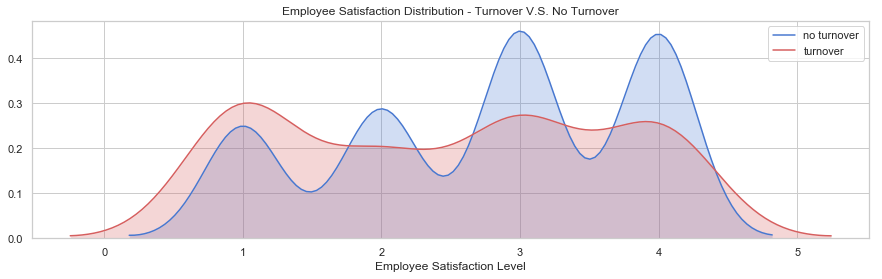

In [101]:
#KDEPlot: Kernel Density Estimate Plot
fig = plt.figure(figsize=(15,4))
ax=sns.kdeplot(df.loc[(df['Attrition'] == 'No'),'EnvironmentSatisfaction'] , color='b',shade=True, label='no turnover')
ax=sns.kdeplot(df.loc[(df['Attrition'] == 'Yes'),'EnvironmentSatisfaction'] , color='r',shade=True, label='turnover')
plt.title('Employee Satisfaction Distribution - Turnover V.S. No Turnover')

<a id='department'></a>
# EDA 4. Employee Department & Job Role versus Attrition

In [93]:
hrleft = df[df['Attrition']=='Yes']

hrleft = pd.DataFrame(hrleft.JobRole.value_counts()).reset_index()
hrstay = pd.DataFrame(df.JobRole.value_counts()).reset_index()

hr_merge = pd.merge(hrleft, hrstay, how='inner', on='index')

hr_merge = hr_merge.rename(columns={"JobRole_x":'left', "JobRole_y":'stay', "index":'Job Role' })

hr_merge

,Job Role,left,stay
0,Laboratory Technician,62,259
1,Sales Executive,57,326
2,Research Scientist,47,292
3,Sales Representative,33,83
4,Human Resources,12,52
5,Manufacturing Director,10,145
6,Healthcare Representative,9,131
7,Manager,5,102
8,Research Director,2,80


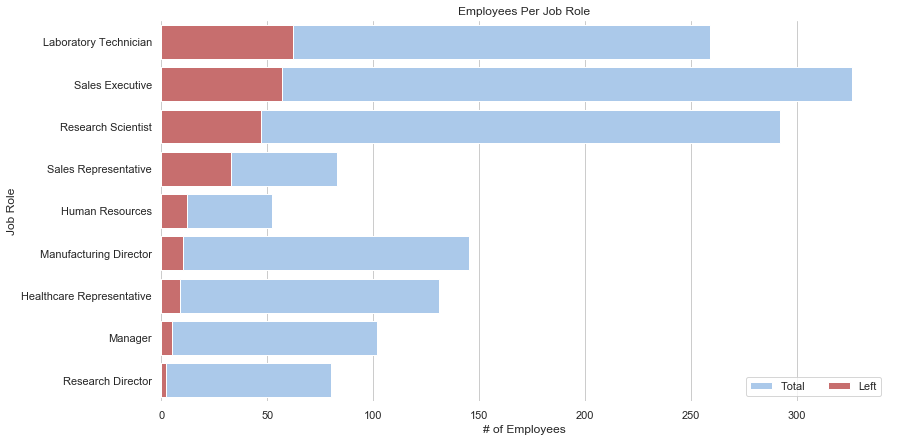

In [94]:
sns.set(style="whitegrid")

# Initialize the matplotlib figure
f, ax = plt.subplots(figsize=(13, 7))

# Plot the total schools per city
sns.set_color_codes("pastel")
sns.barplot(x="stay", y='Job Role', data=hr_merge,
            label="Total", color="b")

# Plot the total community schools per city
sns.set_color_codes("muted")
sns.barplot(x="left", y="Job Role", data=hr_merge,
            label="Left", color="r")

# Add a legend and informative axis label
ax.legend(ncol=2, loc="lower right", frameon=True)
ax.set( ylabel="Job Role", title='Employees Per Job Role',
       xlabel="# of Employees")
sns.despine(left=True, bottom=True)

In [97]:
hrleft = df[df['Attrition']=='Yes']

hrleft = pd.DataFrame(hrleft.Department.value_counts()).reset_index()
hrstay = pd.DataFrame(df.Department.value_counts()).reset_index()

hr_merge = pd.merge(hrleft, hrstay, how='inner', on='index')

hr_merge = hr_merge.rename(columns={"Department_x":'left', "Department_y":'stay', "index":'Department' })
hr_merge

,Department,left,stay
0,Research & Development,133,961
1,Sales,92,446
2,Human Resources,12,63


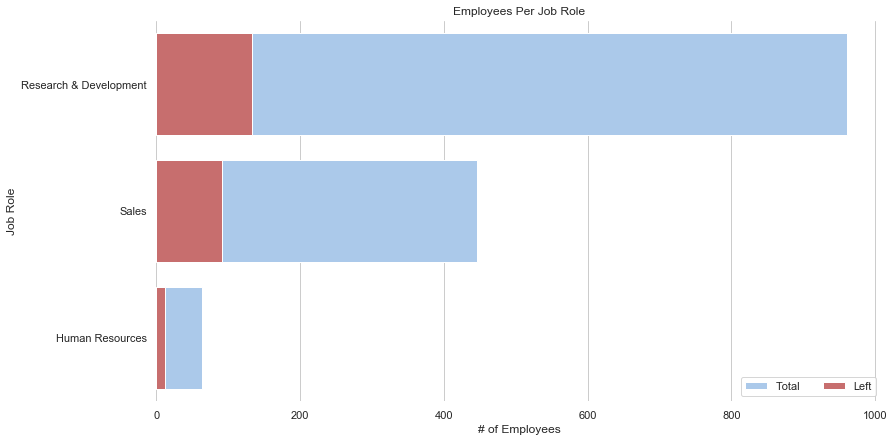

In [98]:
sns.set(style="whitegrid")

# Initialize the matplotlib figure
f, ax = plt.subplots(figsize=(13, 7))

# Plot the total schools per city
sns.set_color_codes("pastel")
sns.barplot(x="stay", y='Department', data=hr_merge,
            label="Total", color="b")

# Plot the total community schools per city
sns.set_color_codes("muted")
sns.barplot(x="left", y="Department", data=hr_merge,
            label="Left", color="r")

# Add a legend and informative axis label
ax.legend(ncol=2, loc="lower right", frameon=True)
ax.set( ylabel="Job Role", title='Employees Per Job Role',
       xlabel="# of Employees")
sns.despine(left=True, bottom=True)

<a id='avghours'></a>
# EDA 5. Monthly Income

**Summary:** 

 - Employees whose salary is less than 2500 / month are most likele to leave.
 - Employees with ~ 10000 / month also tend to leave, possibly top talents being poached by other companies.
 - Executives who are paid the most tend to stay at the company.

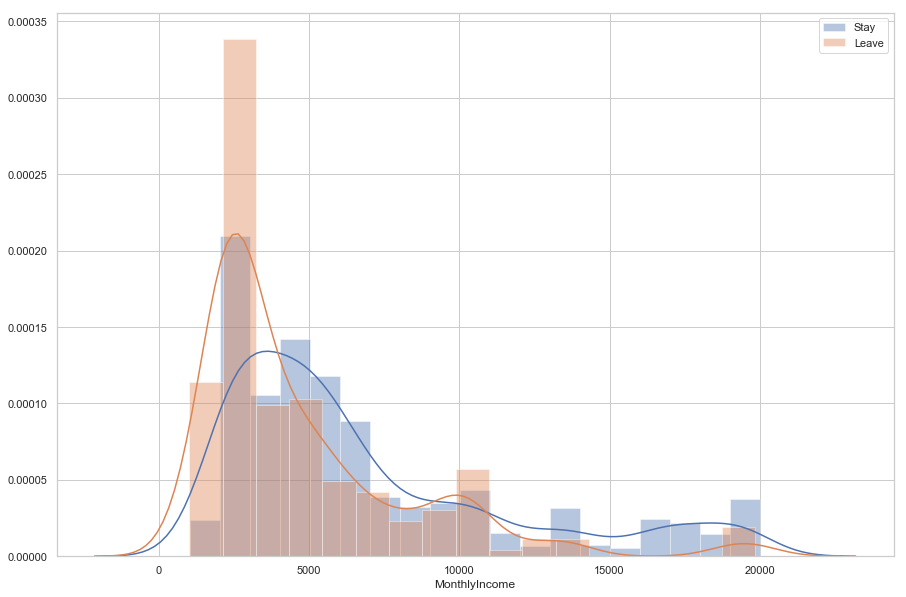

In [130]:
sns.distplot(negative_attrition_df['MonthlyIncome'], label='Stay')
sns.distplot(positive_attrition_df['MonthlyIncome'], label='Leave')
plt.legend()

<a id='class_imbalance'></a>
# Class Imbalance

### Employee Turnover Rate: 16%

Text(0,0.5,'Count')

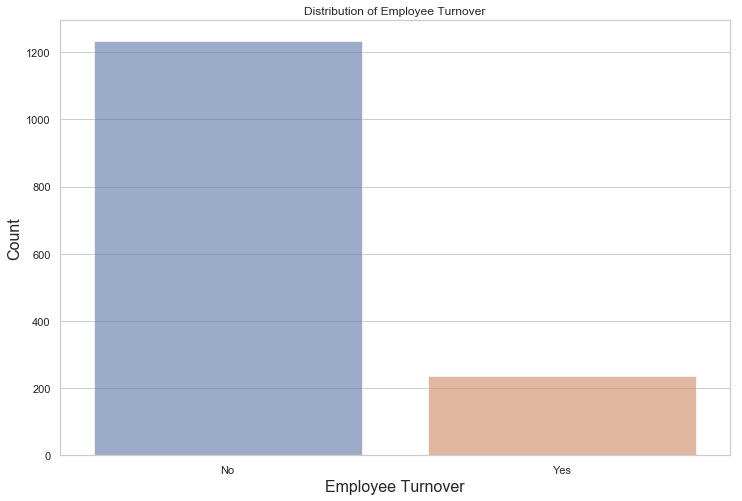

In [133]:
plt.figure(figsize=(12,8))
turnover = df.Attrition.value_counts()
sns.barplot(y=turnover.values, x=turnover.index, alpha=0.6)
plt.title('Distribution of Employee Turnover')
plt.xlabel('Employee Turnover', fontsize=16)
plt.ylabel('Count', fontsize=16)

# How to Treat Imbalanced Datasets

There are many ways of dealing with imbalanced data. We will focus in the following approaches:

1. Oversampling — SMOTE
2. Undersampling — RandomUnderSampler

<a id='train_test_split'></a>
# Split Train/Test Set
***

Let's split our data into a train and test set. We'll fit our model with the train set and leave our test set for our last evaluation.

In [14]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, precision_score, recall_score, confusion_matrix, precision_recall_curve

In [17]:
result = data_encoded['Attrition']
data_encoded.drop(labels=['Attrition'], axis=1,inplace=True)
data_encoded.insert(0, 'Attrition',result)

In [18]:
data_encoded.head()

,Attrition,Age,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,...,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,1,41,2,1102,2,1,2,1,2,0,...,3,1,0,8,0,1,6,4,0,5
1,0,49,1,279,1,8,1,1,3,1,...,4,4,1,10,3,3,10,7,1,7
2,1,37,2,1373,1,2,2,4,4,1,...,3,2,0,7,3,3,0,0,0,0
3,0,33,1,1392,1,3,4,1,4,0,...,3,3,0,8,3,3,8,7,3,0
4,0,27,2,591,1,2,1,3,1,1,...,3,4,1,6,3,3,2,2,2,2


In [19]:
# Create the X and y set
X = data_encoded.iloc[:,1:]
y = data_encoded.iloc[:,0:1]

# Define train and test
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.20, random_state=123, stratify=y)

<a id='resample'></a>
# Resample Methods

Let's train a base logistic regression model on the three types of samples to see which yields the best result:
1. **Orginal Sample**
2. **Upsampling Data**
3. **Downsampling Data**

<img src='https://api.ning.com/files/vvHEZw33BGqEUW8aBYm4epYJWOfSeUBPVQAsgz7aWaNe0pmDBsjgggBxsyq*8VU1FdBshuTDdL2-bp2ALs0E-0kpCV5kVdwu/imbdata.png'/>

In [29]:
from sklearn.utils import resample
#from imblearn.over_sampling import SMOTE 

# Upsample minority class
X_train_u, y_train_u = resample(X_train[y_train == 1],
                                y_train[y_train == 1],
                                replace=True,
                                n_samples=X_train[y_train == 0].shape[0],
                                random_state=1)

X_train_u = np.concatenate((X_train[y_train == 0], X_train_u))
y_train_u = np.concatenate((y_train[y_train == 0], y_train_u))


# Upsample using SMOTE
#sm = SMOTE(random_state=12)# ratio = 1.0)
#x_train_sm, y_train_sm = sm.fit_resample(X_train, y_train)


# Downsample majority class
X_train_d, y_train_d = resample(X_train[y_train == 0],
                                y_train[y_train == 0],
                                replace=True,
                                n_samples=X_train[y_train == 1].shape[0],
                                random_state=1)
X_train_d = np.concatenate((X_train[y_train == 1], X_train_d))
y_train_d = np.concatenate((y_train[y_train == 1], y_train_d))

print("Original shape:", X_train.shape, y_train.shape)
print("Upsampled shape:", X_train_u.shape, y_train_u.shape)
#print ("SMOTE sample shape:", x_train_sm.shape, y_train_sm.shape)
print("Downsampled shape:", X_train_d.shape, y_train_d.shape)

Original shape: (1176, 30) (1176, 1)
Upsampled shape: (2352, 30) (2352, 1)
Downsampled shape: (2352, 30) (2352, 1)


# Train Three Models
***

1. Logistic Regression
2. Random Forest
3. Support Vector Machine

<a id='lr'></a>
# Test Logistic Regression Performance
### Logistic Regression F1 Score (0.78)

In [32]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import accuracy_score

lr = LogisticRegression()

# Fit the model to the Upsampling data
lr = lr.fit(X_train, y_train)

print ("\n\n ---Logistic Regression Model---")
lr_auc = roc_auc_score(y_test, lr.predict(X_test))

print ("Logistic Regression AUC = %2.2f" % lr_auc)

lr2 = lr.fit(X_train, y_train)
print(classification_report(y_test, lr.predict(X_test)))



 ---Logistic Regression Model---
Logistic Regression AUC = 0.50
              precision    recall  f1-score   support

           0       0.84      1.00      0.91       247
           1       0.00      0.00      0.00        47

    accuracy                           0.84       294
   macro avg       0.42      0.50      0.46       294
weighted avg       0.71      0.84      0.77       294



<a id='rf'></a>
# Random Forest Classifier 
***

Notice how the random forest classifier takes a while to run on the dataset. That is one downside to the algorithm, it takes a lot of computation. But it has a better performance than the sipler models like Logistic Regression

### Apply 5-Fold Cross Validation for Random Forest

In [33]:
from sklearn.ensemble import RandomForestClassifier

# Random Forest Model
rf = RandomForestClassifier()

rf_result = cross_val_score(rf, X_train, y_train, cv=5, scoring='f1')

rf_result.mean()

0.27559499161983636

### Random Forest F1 Score (0.99)

In [34]:
from sklearn.metrics import roc_auc_score

rf = rf.fit(X_train, y_train)

print ("\n\n ---Random Forest Model---")
rf_roc_auc = roc_auc_score(y_test, rf.predict(X_test))
print ("Random Forest AUC = %2.2f" % rf_roc_auc)
print(classification_report(y_test, rf.predict(X_test)))



 ---Random Forest Model---
Random Forest AUC = 0.58
              precision    recall  f1-score   support

           0       0.86      0.99      0.92       247
           1       0.80      0.17      0.28        47

    accuracy                           0.86       294
   macro avg       0.83      0.58      0.60       294
weighted avg       0.85      0.86      0.82       294



<a id='svc'></a>
# Gradient Boosting Classifier


In [35]:
from sklearn.ensemble import GradientBoostingClassifier

In [36]:
gbc = GradientBoostingClassifier()  

gbc = gbc.fit(X_train,y_train)

gbc

GradientBoostingClassifier(ccp_alpha=0.0, criterion='friedman_mse', init=None,
                           learning_rate=0.1, loss='deviance', max_depth=3,
                           max_features=None, max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_impurity_split=None,
                           min_samples_leaf=1, min_samples_split=2,
                           min_weight_fraction_leaf=0.0, n_estimators=100,
                           n_iter_no_change=None, presort='deprecated',
                           random_state=None, subsample=1.0, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False)

### Apply 5-Fold Cross Validation for Gradient Boosting Classifier

In [37]:
gbc_result = cross_val_score(gbc, X_train, y_train, cv=5, scoring='f1')
gbc_result.mean()

0.38907947398513437

### Gradient Boosting Classifier F1 Score (0.94)

In [38]:
from sklearn.metrics import roc_auc_score

print ("\n\n ---Gradient Boosting Model---")
gbc_auc = roc_auc_score(y_test, gbc.predict(X_test))
print ("Gradient Boosting Classifier AUC = %2.2f" % gbc_auc)
print(classification_report(y_test, gbc.predict(X_test)))



 ---Gradient Boosting Model---
Gradient Boosting Classifier AUC = 0.63
              precision    recall  f1-score   support

           0       0.88      0.97      0.92       247
           1       0.67      0.30      0.41        47

    accuracy                           0.86       294
   macro avg       0.77      0.63      0.67       294
weighted avg       0.85      0.86      0.84       294



<a id='roc'></a>
# ROC Graph

In [39]:
rf.predict_proba(X_test)

array([[0.69, 0.31],
       [0.86, 0.14],
       [0.92, 0.08],
       [0.95, 0.05],
       [0.75, 0.25],
       [0.99, 0.01],
       [0.63, 0.37],
       [0.5 , 0.5 ],
       [0.97, 0.03],
       [0.99, 0.01],
       [0.83, 0.17],
       [0.86, 0.14],
       [0.87, 0.13],
       [0.87, 0.13],
       [0.75, 0.25],
       [0.92, 0.08],
       [0.66, 0.34],
       [0.95, 0.05],
       [0.9 , 0.1 ],
       [0.92, 0.08],
       [0.36, 0.64],
       [0.74, 0.26],
       [0.95, 0.05],
       [0.89, 0.11],
       [0.98, 0.02],
       [0.87, 0.13],
       [0.69, 0.31],
       [0.79, 0.21],
       [0.94, 0.06],
       [0.75, 0.25],
       [0.76, 0.24],
       [0.8 , 0.2 ],
       [0.88, 0.12],
       [0.86, 0.14],
       [0.94, 0.06],
       [0.71, 0.29],
       [0.84, 0.16],
       [0.73, 0.27],
       [0.82, 0.18],
       [0.95, 0.05],
       [0.92, 0.08],
       [0.94, 0.06],
       [0.92, 0.08],
       [0.97, 0.03],
       [0.78, 0.22],
       [0.89, 0.11],
       [0.72, 0.28],
       [0.83,

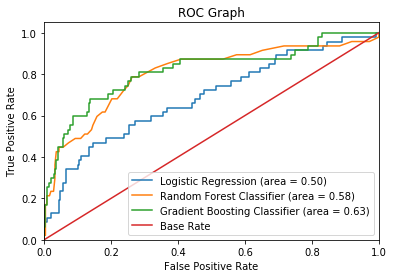

In [40]:
# Create ROC Graph
from sklearn.metrics import roc_curve
fpr, tpr, thresholds = roc_curve(y_test, lr.predict_proba(X_test)[:,1])
rf_fpr, rf_tpr, rf_thresholds = roc_curve(y_test, rf.predict_proba(X_test)[:,1])
gbc_fpr, gbc_tpr, gbc_thresholds = roc_curve(y_test, gbc.predict_proba(X_test)[:,1])


plt.figure()

# Plot Logistic Regression ROC
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % lr_auc)

# Plot Random Forest ROC
plt.plot(rf_fpr, rf_tpr, label='Random Forest Classifier (area = %0.2f)' % rf_roc_auc)

# Plot Decision Tree ROC
plt.plot(gbc_fpr, gbc_tpr, label='Gradient Boosting Classifier (area = %0.2f)' % gbc_auc)

# Plot Base Rate ROC
plt.plot([0,1], [0,1],label='Base Rate')

plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Graph')
plt.legend(loc="lower right")
plt.show()

In [41]:
# Confusion Matrix for Linear Regresion
confusion_matrix(y_test, lr.predict(X_test))

array([[247,   0],
       [ 47,   0]], dtype=int64)

In [42]:
confusion_matrix(y_test, gbc.predict(X_test))

array([[240,   7],
       [ 33,  14]], dtype=int64)

In [43]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test, rf.predict(X_test))

array([[245,   2],
       [ 39,   8]], dtype=int64)

# Recall or Precision?
***
It depends on how much cost/weight you want on your two types of errors: (1) **False Positives** or (2) **False Negatives**

What's the coset of having a FN and FP?


**Optimize Recall When:**
- You want to limit **false negatives**
- You will get more False Positives
- FN > FP
- Example: Predicting Cancer Patients or Credit Card Fraud

**Optimize Precision When:**
- You want to limit **false positives**
- FP > FN
- Example: Spam VS Not Spam

<a id='feature_importance'></a>
# Random Forest Feature Importances

In [44]:
# Get Feature Importances
feature_importances = pd.DataFrame(rf.feature_importances_,
                                   index = X_train.columns,
                                    columns=['importance']).sort_values('importance', ascending=False)
feature_importances = feature_importances.reset_index()
feature_importances

,index,importance
0,MonthlyIncome,0.076757
1,Age,0.066008
2,DailyRate,0.056675
3,MonthlyRate,0.051888
4,OverTime,0.051818
5,TotalWorkingYears,0.050220
6,HourlyRate,0.049688
7,YearsAtCompany,0.047796
8,DistanceFromHome,0.047055
9,NumCompaniesWorked,0.037393


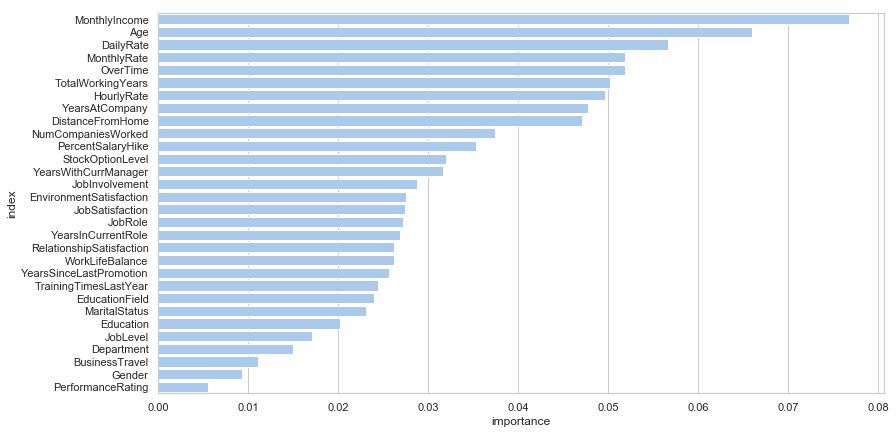

In [45]:
sns.set(style="whitegrid")

# Initialize the matplotlib figure
f, ax = plt.subplots(figsize=(13, 7))

# Plot the Feature Importance
sns.set_color_codes("pastel")
sns.barplot(x="importance", y='index', data=feature_importances,
            label="Total", color="b")

# Apply Random Noise to Feature Importance

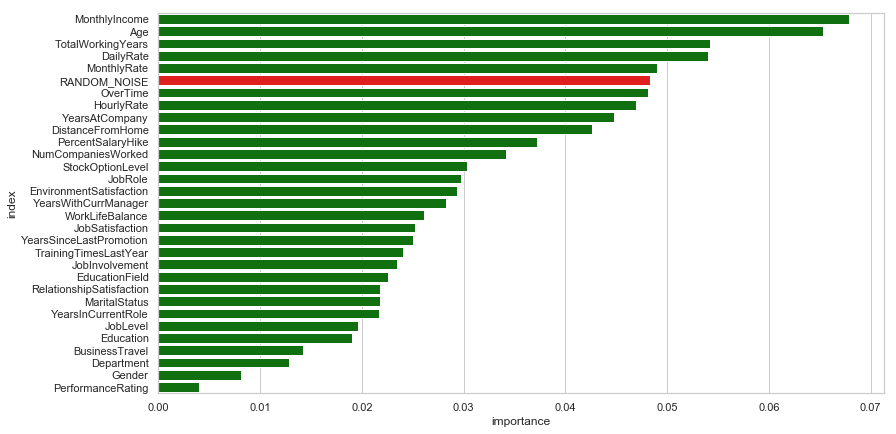

In [46]:
# Apply Random Noise to data set
X_train_rnoise = pd.DataFrame(X_train)
X_train_rnoise['RANDOM_NOISE'] = np.random.normal(0, 1, X_train_rnoise.shape[0])

# Fit Random Forest to DataSet
rf_random = RandomForestClassifier()
rf_random = rf_random.fit(X_train_rnoise, y_train)

# Get Feature Importances
feature_importances_random = pd.DataFrame(rf_random.feature_importances_, index = X_train_rnoise.columns,columns=['importance']).sort_values('importance', ascending=False)
feature_importances_random = feature_importances_random.reset_index()

# Create Seaborn PLot
sns.set(style="whitegrid")
# Initialize the matplotlib figure
f, ax = plt.subplots(figsize=(13, 7))


clrs = ['red' if (x == 5 ) else 'green' for x in feature_importances_random.index.values ]

# Plot the Feature Importance
sns.barplot(x="importance", y='index', data=feature_importances_random,
            label="Total",  palette=clrs)

In [47]:
X_train_rnoise.head()

,Age,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,HourlyRate,...,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,RANDOM_NOISE
324,30,2,1275,1,28,2,3,4,0,64,...,4,2,11,2,3,10,8,1,9,-0.238775
791,35,2,1204,2,4,3,5,4,1,86,...,1,0,9,2,3,8,7,4,7,-0.800016
442,36,0,635,2,10,4,3,2,1,32,...,4,0,10,3,2,10,3,9,7,0.704825
531,32,2,1018,1,3,2,1,3,0,39,...,4,0,10,6,3,7,7,7,7,-0.112194
1419,42,2,557,1,18,4,1,4,1,35,...,3,1,9,3,2,4,3,1,2,-0.999286


In [48]:
rf.predict_proba(X_test)[175:225]

array([[0.81, 0.19],
       [0.88, 0.12],
       [0.89, 0.11],
       [0.92, 0.08],
       [0.75, 0.25],
       [0.88, 0.12],
       [0.61, 0.39],
       [0.88, 0.12],
       [0.84, 0.16],
       [0.96, 0.04],
       [0.9 , 0.1 ],
       [0.87, 0.13],
       [0.89, 0.11],
       [0.84, 0.16],
       [0.9 , 0.1 ],
       [0.82, 0.18],
       [0.92, 0.08],
       [0.5 , 0.5 ],
       [0.94, 0.06],
       [0.84, 0.16],
       [0.99, 0.01],
       [0.93, 0.07],
       [0.72, 0.28],
       [0.63, 0.37],
       [0.93, 0.07],
       [0.99, 0.01],
       [0.85, 0.15],
       [0.88, 0.12],
       [0.85, 0.15],
       [0.89, 0.11],
       [0.94, 0.06],
       [0.38, 0.62],
       [0.6 , 0.4 ],
       [0.96, 0.04],
       [0.89, 0.11],
       [0.84, 0.16],
       [0.92, 0.08],
       [0.9 , 0.1 ],
       [0.42, 0.58],
       [0.42, 0.58],
       [0.62, 0.38],
       [0.94, 0.06],
       [0.93, 0.07],
       [0.97, 0.03],
       [0.87, 0.13],
       [0.99, 0.01],
       [0.94, 0.06],
       [0.95,

# What to Optimize

We want our machine learn model to capture as much of the minority class as possible (turnover group). Our objective is to catch ALL of the highly probable turnover employee at the risk of flagging some low-risk non-turnover employee. 

# Selection Bias
***

- One thing to note about this dataset is the turnover feature. We don't know if the employees that left are interns, contractors, full-time, or part-time. These are important variables to take into consideration when performing a machine learning algorithm to it. 

- Another thing to note down is the type of bias of the evaluation feature. Evaluation is heavily subjective, and can vary tremendously depending on who is the evaluator. If the employee knows the evaluator, then he/she will probably have a higher score. 